In [ ]:

from google.colab import drive
drive.mount('/content/drive')

!pip install scikit-learn matplotlib seaborn opencv-python-headless pandas

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.metrics import confusion_matrix

In [ ]:
data_dir = '/content/drive/MyDrive/lab1_ML/MangoLeafBD Dataset'  # Update this path as needed
categories = ["Anthracnose", "Bacterial Canker", "Cutting Weevil", "Die Back",
              "Gall Midge", "Healthy", "Powdery Mildew", "Sooty Mould"]

# Function to load images and labels
def load_images(data_dir, categories, img_size=(128, 128)):
    images = []
    labels = []
    avg_colors = []
    for label, category in enumerate(categories):
        path = os.path.join(data_dir, category)
        if not os.path.isdir(path):
            print(f"Directory not found: {path}")
            continue
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            try:
                img = cv2.imread(img_path)
                img = cv2.resize(img, img_size)
                images.append(img)
                labels.append(label)
                avg_colors.append(cv2.mean(img)[:3])  # BGR average
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    return np.array(images), np.array(labels), np.array(avg_colors)

# Load images, labels, and average color information
images, labels, avg_colors = load_images(data_dir, categories)

<ipython-input-6-561380b021f9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()), palette='pastel')


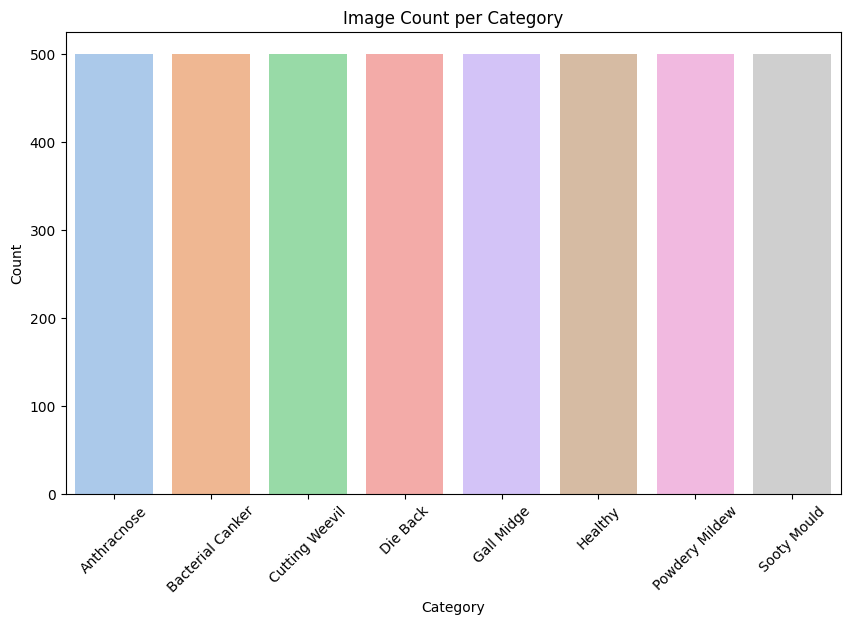

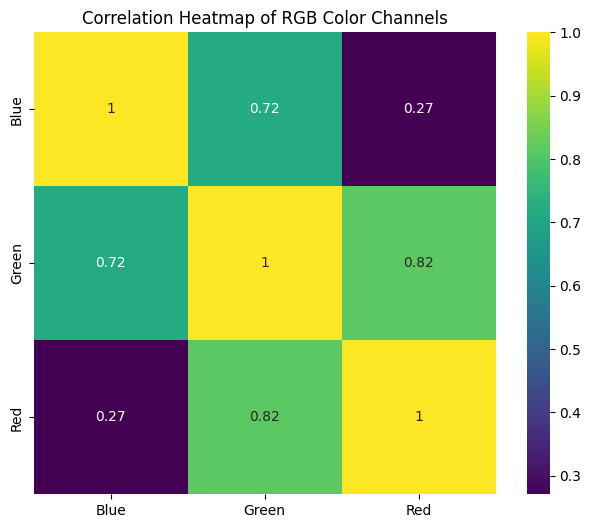

Category Summary Table


,Category,Image Count,Avg Blue,Avg Green,Avg Red
0,Anthracnose,500,177.381043,181.291865,175.884111
1,Bacterial Canker,500,161.357619,173.474733,174.161276
2,Cutting Weevil,500,198.101516,176.394646,152.015702
3,Die Back,500,188.665198,171.646450,160.609038
4,Gall Midge,500,171.364578,179.479750,180.386189
5,Healthy,500,173.119382,184.125183,180.827063
6,Powdery Mildew,500,164.235554,168.028189,166.434599
7,Sooty Mould,500,162.735904,175.105250,175.701873


In [ ]:
#1. Display Category Distribution
category_counts = Counter(labels)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()), palette='pastel')
plt.xticks(range(len(categories)), categories, rotation=45)
plt.title('Image Count per Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


color_df = pd.DataFrame(avg_colors, columns=['Blue', 'Green', 'Red'])
plt.figure(figsize=(8, 6))
sns.heatmap(color_df.corr(), annot=True, cmap='viridis', square=True)
plt.title("Correlation Heatmap of RGB Color Channels")
plt.show()


summary_data = {
    "Category": categories,
    "Image Count": [category_counts[cat] for cat in range(len(categories))],
    "Avg Blue": [np.mean(avg_colors[labels == cat, 0]) for cat in range(len(categories))],
    "Avg Green": [np.mean(avg_colors[labels == cat, 1]) for cat in range(len(categories))],
    "Avg Red": [np.mean(avg_colors[labels == cat, 2]) for cat in range(len(categories))]
}
summary_df = pd.DataFrame(summary_data)

# Display the summary table
print("Category Summary Table")
display(summary_df)

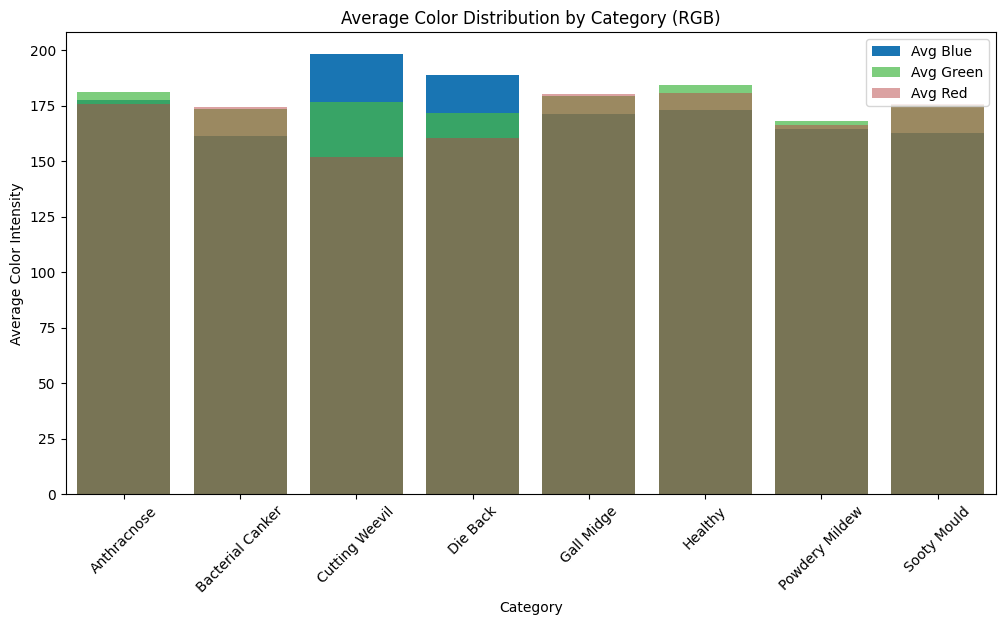

In [ ]:
# Visualization of Average Color Intensity by Category
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Avg Blue', data=summary_df, color='#007ACC', label="Avg Blue")
sns.barplot(x='Category', y='Avg Green', data=summary_df, color='#33CC33', label="Avg Green", alpha=0.7)
sns.barplot(x='Category', y='Avg Red', data=summary_df, color='#CC3333', label="Avg Red", alpha=0.5)
plt.title("Average Color Distribution by Category (RGB)")
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Average Color Intensity")
plt.legend()
plt.show()

In [ ]:

flat_images = images.reshape(len(images), -1)


X_train, X_test, y_train, y_test = train_test_split(flat_images, labels, test_size=0.3, random_state=42)


dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Train and evaluate Decision Tree
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Performance:\n", classification_report(y_test, y_pred_dt, target_names=categories))

# Train and evaluate Random Forest
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Performance:\n", classification_report(y_test, y_pred_rf, target_names=categories))

Decision Tree Performance:
                   precision    recall  f1-score   support

     Anthracnose       0.70      0.57      0.63       167
Bacterial Canker       0.73      0.78      0.76       148
  Cutting Weevil       0.87      0.90      0.88       158
        Die Back       0.77      0.83      0.80       149
      Gall Midge       0.56      0.53      0.54       159
         Healthy       0.63      0.69      0.66       135
  Powdery Mildew       0.52      0.60      0.56       134
     Sooty Mould       0.57      0.47      0.52       150

        accuracy                           0.67      1200
       macro avg       0.67      0.67      0.67      1200
    weighted avg       0.67      0.67      0.67      1200

Random Forest Performance:
                   precision    recall  f1-score   support

     Anthracnose       0.90      0.84      0.87       167
Bacterial Canker       0.91      0.91      0.91       148
  Cutting Weevil       0.98      0.90      0.94       158
        Die 

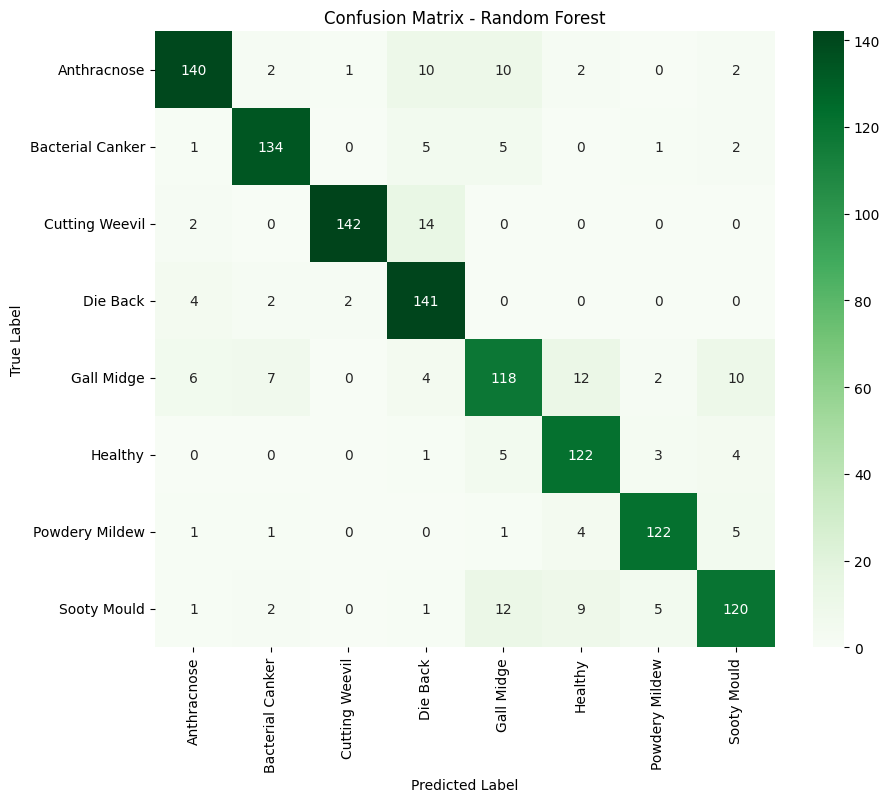

In [ ]:
# Confusion Matrix for Random Forest
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()